<a href="https://colab.research.google.com/github/LucianoTrujillo/7506R-2C2022-GRUPO10/blob/main/practica_analisis_valores_atipicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Feature Engineering</center>
### <center> Práctica Análisis de Valores Atípicos</center>






En esta notebook vamos a prácticar las técnicas para detectar outliers univariados y multivariados


## Carga Librerias y Dataset

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

El dataset contiene información sobre la edad, altura y peso de 28 personas adultas de sexo masculino.

In [ ]:
df=pd.read_csv("datasets/varones_adultos.csv")
df.head()

,Edad,Altura,Peso
0,25,180,83.0
1,21,189,86.0
2,39,154,50.0
3,49,166,70.0
4,31,170,81.0


## Análisis univariado

# New Section

Mediante el análisis de los gráficos de tipo Box-Plot vamos a intentar identificar outliers univariados.

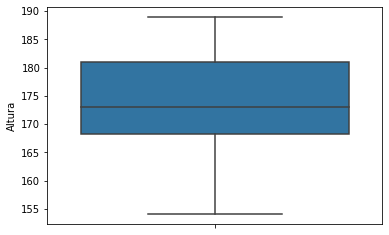

In [ ]:
sns.boxplot(y=df.Altura)
plt.show()

In [ ]:
#Cuartiles
Q1_altura=np.quantile(df.Altura,0.25)
Q3_altura=np.quantile(df.Altura,0.75)

#Rango intercuartil
IQR_altura=Q3_altura-Q1_altura

#Limite inferior Outliers
out_inf=Q1_altura-1.5*IQR_altura
out_sup=Q3_altura+1.5*IQR_altura
print(out_inf)
print(out_sup)

149.125
200.125


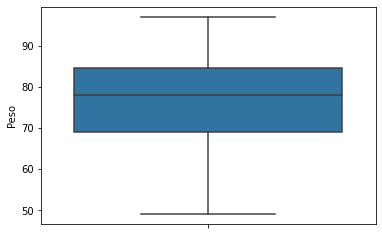

In [ ]:
sns.boxplot(y=df.Peso)
plt.show()

In [ ]:
#Cuartiles
Q1_peso=np.quantile(df.Peso,0.25)
Q3_peso=np.quantile(df.Peso,0.75)

#Rango intercuartil
IQR_peso=Q3_peso-Q1_peso

#Limite superior Outliers
out_sup=Q3_peso+1.5*IQR_peso
out_inf=Q1_peso-1.5*IQR_peso
print(out_inf)
print(out_sup)

45.75
107.75


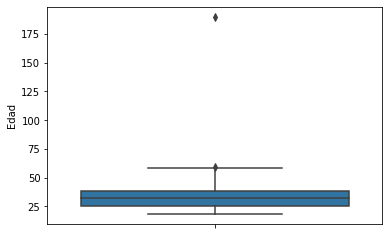

In [ ]:
sns.boxplot(y=df.Edad)
plt.show()

Encontramos que sólo existen outliers univariados en la variable Edad.

Verificamos que no se trata de un valor posible y procedemos a eliminarlo

In [ ]:
#Observación anómala
outlier=df[df['Edad']>100]
outlier

,Edad,Altura,Peso
26,190,177,76.0


In [ ]:
#Eliminación de outlier por ínidce de fila
indice_outlier=df[df['Edad']>100].index
df.drop(indice_outlier, inplace=True)

Visualicemos nuevamente el Box-Plot

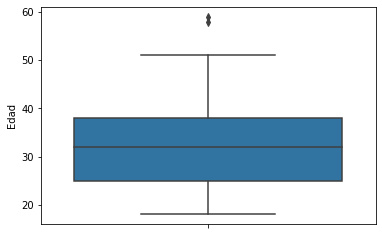

In [ ]:
sns.boxplot(y=df.Edad)
plt.show()

¿Qué valores tienen las nuevas observaciones atípicas?

¿Debemos eliminarlos?

Ahora probemos lás técnicas z-score y z-score modificado para las tres variables que tenemos en el dataset

TODO: ¿Se detectan anomalías que no visualizamos en los boxplot?

TODO: Calcular los scores para la variable altura


In [ ]:
#z-score Edad
media_edad=np.mean(df.Edad)
std_edad=np.std(df.Edad)
df['z_edad']=(df.Edad - media_edad)/std_edad

#z-score Peso con librería stats
df['z_peso']=st.zscore(df.Peso)

In [ ]:
#z-score modificado Edad
mediana_edad=np.median(df.Edad)
MAD=np.median(np.absolute(df.Edad-mediana_edad))

df['zm_edad']=(df.Edad - mediana_edad)*0.6745/MAD

#z-score modificado Peso
mediana_peso=np.median(df.Peso)
MAD=np.median(np.absolute(df.Peso-mediana_peso))

df['zm_peso']=(df.Peso - mediana_peso)*0.6745/MAD

In [ ]:
df.head()

,Edad,Altura,Peso,z_edad,z_peso,zm_edad,zm_peso
0,25,180,83.0,-0.740534,0.548239,-0.674500,0.20235
1,21,189,86.0,-1.089729,0.780115,-1.059929,0.40470
2,39,154,50.0,0.481648,-2.002393,0.674500,-2.02350
3,49,166,70.0,1.354635,-0.456555,1.638071,-0.67450
4,31,170,81.0,-0.216742,0.393656,-0.096357,0.06745


Verifiquemos si se cumple la regla de oro para el caso de la variable Edad

TODO: Verificar para el resto de las variables

In [ ]:
df[df['z_edad']>3]

,Edad,Altura,Peso,z_edad,z_peso,zm_edad,zm_peso


In [ ]:
df[df['z_edad']<-3]

,Edad,Altura,Peso,z_edad,z_peso,zm_edad,zm_peso


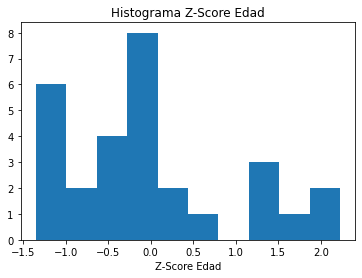

In [ ]:
plt.hist(df.z_edad)
plt.title('Histograma Z-Score Edad')
plt.xlabel('Z-Score Edad')
plt.show()

In [ ]:
df[(df['zm_edad']>3.5)]

,Edad,Altura,Peso,z_edad,z_peso,zm_edad,zm_peso


In [ ]:
df[(df['zm_edad']<-3.5)]

,Edad,Altura,Peso,z_edad,z_peso,zm_edad,zm_peso


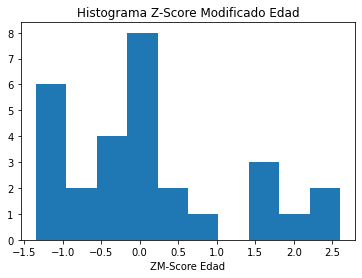

In [ ]:
plt.hist(df.zm_edad)
plt.title('Histograma Z-Score Modificado Edad')
plt.xlabel('ZM-Score Edad')
plt.show()

TODO: Volver a cargar el dataset y calcular Z-Score y Z-Score Modificado sobre la variable Edad antes de eliminar el outlier que detectamos. ¿Qué se detecta?

## Análisis Multivariado - Mahalanobis

Vamos a analizar la presencia de outliers multivariados.
Exploremos las variables Peso y Altura

TODO: ¿Existen outliers multivariados entre Edad y Peso? ¿Entre Edad y Altura?



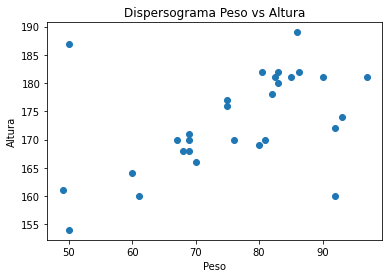

In [ ]:
#Scatter Plot
plt.scatter(df.Peso,df.Altura)
plt.title('Dispersograma Peso vs Altura')
plt.xlabel('Peso')
plt.ylabel('Altura')
plt.show()

Parecerían exisitir algunas observaciones anómalas, calculemos la distancia de mahalanobis para cada observación

In [ ]:
#Calulo el vector de medias
vmedias=np.mean(df[['Peso','Altura']])

#Calculo la diferencia entre las observaciones y el vector de medias
x_dif = df[['Peso','Altura']] - vmedias

#Calculo matriz de covarianza y su inversa
cov=df[['Peso','Altura']].cov().values
inv_cov = np.linalg.inv(cov)

#Calculamos el cuadrado de la distancia de mahalanobis
mahal =np.dot( np.dot(x_dif, inv_cov) , x_dif.T)

df['mahalanobis']=mahal.diagonal()

In [ ]:
df.head()

,Edad,Altura,Peso,z_edad,z_peso,zm_edad,zm_peso,mahalanobis
0,25,180,83.0,-0.740534,0.548239,-0.674500,0.20235,0.634661
1,21,189,86.0,-1.089729,0.780115,-1.059929,0.40470,3.282629
2,39,154,50.0,0.481648,-2.002393,0.674500,-2.02350,5.912538
3,49,166,70.0,1.354635,-0.456555,1.638071,-0.67450,0.692074
4,31,170,81.0,-0.216742,0.393656,-0.096357,0.06745,0.561215


Tenemos que seleccionar un valor umbral para definir qué observaciones podrían ser anómalas según la distancia de mahalanobis.

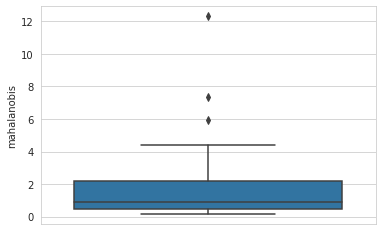

In [ ]:
sns.boxplot(y=df.mahalanobis)

In [ ]:
#Ordeno las distancias de menor a mayor
np.sort(df.mahalanobis)

array([ 0.16531548,  0.18462032,  0.27516792,  0.28780785,  0.29282831,
        0.34857322,  0.43162462,  0.45991061,  0.4853349 ,  0.56121468,
        0.63025257,  0.6346609 ,  0.69207366,  0.79747833,  0.8781916 ,
        1.0119434 ,  1.03471039,  1.12668052,  1.32329674,  1.75038497,
        2.07578928,  2.20817122,  2.5072773 ,  2.58188404,  3.28262935,
        4.39409308,  5.9125378 ,  7.35537802, 12.31016894])

Seleccionamos 7 como valor umbral 

TODO: Probar diferentes valores para el umbral
¿Qué observan?

In [ ]:
#Defino umbral
umbral=7

#Observacione anómalas
df[df['mahalanobis']>umbral]

,Edad,Altura,Peso,z_edad,z_peso,zm_edad,zm_peso,mahalanobis
28,38,160,92.0,0.394349,1.243866,0.578143,0.8094,7.355378
29,28,187,50.0,-0.478638,-2.002393,-0.385429,-2.0235,12.310169


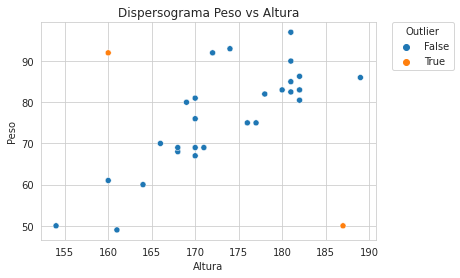

In [ ]:
#Grafico scatter
es_outlier = (df['mahalanobis'] > umbral)

sns.scatterplot(x=df.Altura,y=df.Peso, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma Peso vs Altura')
plt.show()

Consideremos ahora las tres variables Edad, Altura y Peso
Calculemos nuevamente mahalanobis

In [ ]:
#Calulo el vector de medias
vmedias=np.mean(df[['Edad','Peso','Altura']])

#Calculo la diferencia entre las observaciones y el vector de medias
x_dif = df[['Edad','Peso','Altura']] - vmedias

#Calculo matriz de covarianza y su inversa
cov=df[['Edad','Peso','Altura']].cov().values
inv_cov = np.linalg.inv(cov)

#Calculamos el cuadrado de la distancia de mahalanobis
mahal =np.dot( np.dot(x_dif, inv_cov) , x_dif.T)

df['mahalanobis_2']=mahal.diagonal()

In [ ]:
#Ordeno las distancias de menor a mayor
np.sort(df.mahalanobis_2)

array([ 0.37150216,  0.37934678,  0.52866506,  0.55835641,  0.7133231 ,
        0.75828386,  0.78281771,  0.80152428,  1.35422886,  1.55318713,
        1.75316131,  1.81799835,  1.82062011,  1.8246763 ,  1.99660886,
        2.09565518,  2.19299299,  2.41803394,  2.43566772,  3.04379896,
        3.33646289,  4.04767274,  4.6387963 ,  4.83272413,  5.5432817 ,
        6.16033117,  6.53849881,  7.39015364, 12.31162957])

In [ ]:
#Defino umbral
umbral=6

#Observacione anómalas
df[df['mahalanobis_2']>umbral]

,Edad,Altura,Peso,z_edad,z_peso,zm_edad,zm_peso,mahalanobis,mahalanobis_2
2,39,154,50.0,0.481648,-2.002393,0.674500,-2.0235,5.912538,6.538499
25,50,181,90.0,1.441934,1.089283,1.734429,0.6745,1.323297,6.160331
28,38,160,92.0,0.394349,1.243866,0.578143,0.8094,7.355378,7.390154
29,28,187,50.0,-0.478638,-2.002393,-0.385429,-2.0235,12.310169,12.311630


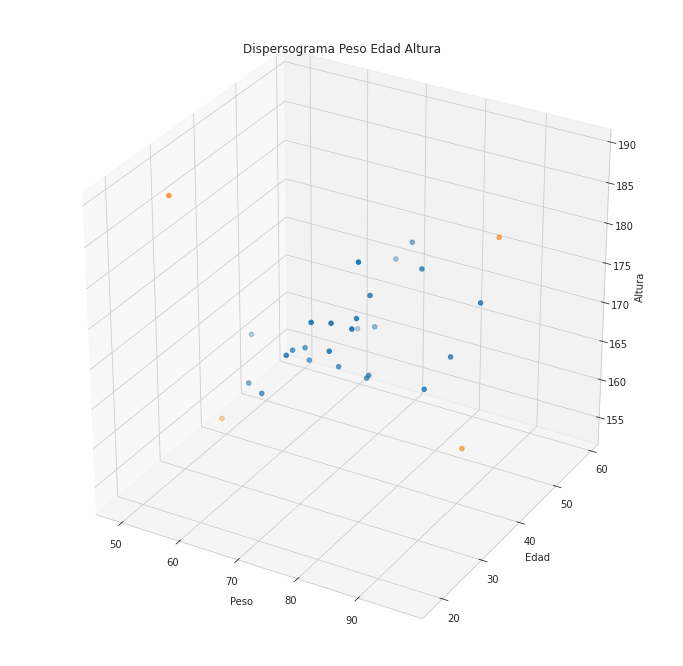

In [ ]:
#Gráfico 3D
es_outlier = (df['mahalanobis_2'] > umbral)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

color=[f"C{n}" for n in (es_outlier*1)]
ax.scatter(df.Peso,df.Edad,df.Altura,c=color)
ax.set_xlabel('Peso')
ax.set_ylabel('Edad')
ax.set_zlabel('Altura')
plt.title('Dispersograma Peso Edad Altura')
plt.show()

¿Qué podemos hacer con estos valores anómalos que detectamos?

Podrían resultar de interés si, por ejemplo, queremos estudiar la relación de estas variables con ciertos aspectos de la salud

In [ ]:
#Calculo el Índice de masa corporal
df['IMC']=np.round(df.Peso/(df.Altura/100)**2,2)

#Observaciones anómalas
df[df['mahalanobis_2']>umbral]

,Edad,Altura,Peso,z_edad,z_peso,zm_edad,zm_peso,mahalanobis,mahalanobis_2,IMC
2,39,154,50.0,0.481648,-2.002393,0.674500,-2.0235,5.912538,6.538499,21.08
25,50,181,90.0,1.441934,1.089283,1.734429,0.6745,1.323297,6.160331,27.47
28,38,160,92.0,0.394349,1.243866,0.578143,0.8094,7.355378,7.390154,35.94
29,28,187,50.0,-0.478638,-2.002393,-0.385429,-2.0235,12.310169,12.311630,14.30


La observación 28 corresponde a una persona con sobrepeso

La observación 29 corresopnden a una personas con bajo peso 

### Análisis Multivariado - Isolation Forest

Vamos a leeremos el conjunto de datos del iris usando la función load_iris. 

El objetivo es verificar las anomalías en este conjunto de datos.

Hay cuatro características recolectadas de cada muestra: la longitud y el ancho de los sépalos y pétalos. 

Estas características serán detectadas por el algoritmo Isolation Forest para verificar si las observaciones son anómalas o no.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest

In [ ]:
#Cargo el dataset
data = load_iris(as_frame=True)
X,y = data.data,data.target
df = data.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#Renombro las columnas
df.columns=['sepal_length', 'sepal_width', 'petal_length','petal_width', 'target']
X.columns=['sepal_length', 'sepal_width', 'petal_length','petal_width']

Vamos a definir el modelo, hay hiperparámetros relevantes para definir:

*   contaminación: es la proporción de anomalías en el conjunto de datos. En este caso, lo fijamos igual a 0.05
*  max_samples: es el número máximo de muestras a considerar de nuestro conjunto de datos. Usaremos todas las muestras.
* max_features: es el número máximo de características que se pueden considerar durante el entrenamiento del modelo. Usaremos las cuatro características.
* n_estimators: es el número de árboles de aislamiento que se construirán. Usaremos 100 estimadores.

In [ ]:
#Creo el modelo
iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.05, max_features=4, 
                          bootstrap=False, n_jobs=-1, random_state=1)

Después de definir el modelo, podemos ajustar el modelo a los datos y devolver las etiquetas para X. 

Esta tarea se realiza mediante la función fit_predict.

In [ ]:
#Entreno y genero la predicción
pred= iforest.fit_predict(X)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


Podemos encontrar la puntuación de anomalía usando la función decision_function y podemos almacenar las etiquetas obtenidas en las predicciones.

Cuando la etiqueta es igual a -1 tenemos anomalías, si la etiqueta es 1 tenemos observaciones normales .

In [ ]:
#Almaceno scores y etiquetas
df['scores']=iforest.decision_function(X)
df['outlier_label']=pred

#Observaciones anómalas
df[df.outlier_label==-1]

,sepal_length,sepal_width,petal_length,petal_width,target,scores,outlier_label
13,4.3,3.0,1.1,0.1,0,-0.039104,-1
15,5.7,4.4,1.5,0.4,0,-0.003895,-1
41,4.5,2.3,1.3,0.3,0,-0.038639,-1
60,5.0,2.0,3.5,1.0,1,-0.008813,-1
109,7.2,3.6,6.1,2.5,2,-0.037663,-1
117,7.7,3.8,6.7,2.2,2,-0.046873,-1
118,7.7,2.6,6.9,2.3,2,-0.055233,-1
131,7.9,3.8,6.4,2.0,2,-0.064742,-1


In [ ]:
#Cantidad de obs. anómalas
df.outlier_label.value_counts()

 1    142
-1      8
Name: outlier_label, dtype: int64

Obtuvimos 8 muestras anómalas, visualicemos las mismas en un dispersograma.

TODO: Graficar un pairplot con todas las variables resaltando los outliers detectados.

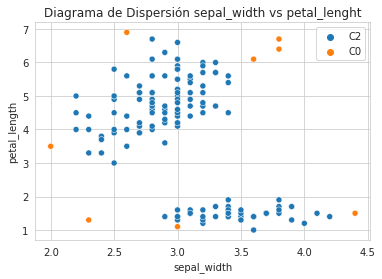

In [ ]:
#Grafico dispersograma
color=[f"C{n+1}" for n in (df['outlier_label'].values)]

sns.scatterplot(df['sepal_width'],df['petal_length'],hue=color)
plt.title('Diagrama de Dispersión sepal_width vs petal_lenght')
plt.show()

También podemos visualizar uno de los 100 estimadores.

En este caso seleccionamos el quinto árbol.

TODO: Modificar el parámetro max_depth y visualizar nuevamente.

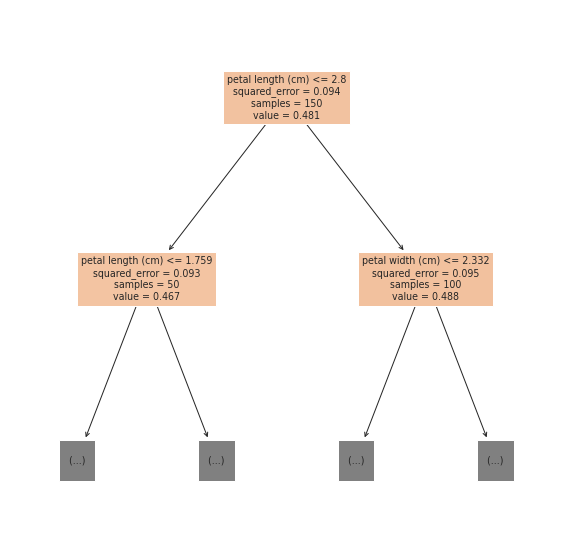

In [ ]:
#Selecciono el árbol
estimator = iforest.estimators_[5]

#Grafico
plt.figure(figsize=(10,10))
sk.tree.plot_tree(estimator,feature_names=data.feature_names,filled=True,max_depth=1)
plt.show()

In [ ]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

estimator = iforest.estimators_[5]

export_graphviz(estimator,out_file='tree.dot',max_depth=5,
                feature_names = data.feature_names,
                special_characters=True,rounded=True,precision=2)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
Image(filename = 'tree.png')

## Análisis Multivariado - LOF

Vamos a intentar detectar outliers multivariados sobre el dataset iris utilizanod LOF.

Trabajaremos sobre las variables sepal_length y petal_length.

TODO: Probar el algoritmo sobre otro conjunto de variables.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
#Cargo el dataset
data = load_iris(as_frame=True)
#X,y = data.data,data.target
df = data.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#Renombro las columnas
df.columns=['sepal_length', 'sepal_width', 'petal_length','petal_width', 'target']

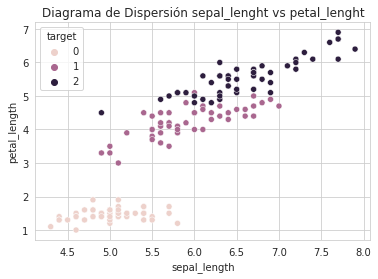

In [ ]:
sns.scatterplot(df['sepal_length'],df['petal_length'],hue=df['target'])
plt.title('Diagrama de Dispersión sepal_lenght vs petal_lenght')
plt.show()

In [ ]:
#Conjunto de entrenamiento
X=df[['petal_length','sepal_length']].values

#Creo el clasificador
clf = LocalOutlierFactor(n_neighbors=20)

#Genero prediccion
y_pred = clf.fit_predict(X)

#Guardo los scores
df['scores']=clf.negative_outlier_factor_

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,scores
0,5.1,3.5,1.4,0.2,0,-0.977549
1,4.9,3.0,1.4,0.2,0,-0.966736
2,4.7,3.2,1.3,0.2,0,-1.185295
3,4.6,3.1,1.5,0.2,0,-1.271967
4,5.0,3.6,1.4,0.2,0,-0.971886


Visualicemos los datos y sus scores en un diagrama de dispersión

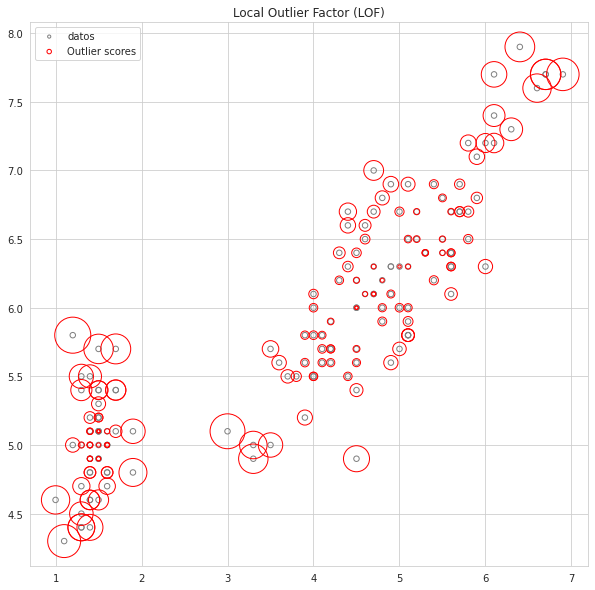

In [ ]:
#Calculo radio para plotear score
radius = (df.scores.max() - df.scores) / (df.scores.max() - df.scores.min())

#Grafico LOF
plt.figure(figsize=(10,10))
plt.title("Local Outlier Factor (LOF)")
plt.scatter(df.petal_length.values,df.sepal_length.values, edgecolor='grey', s=30, label='datos',facecolors='none')
plt.scatter(df.petal_length.values,df.sepal_length.values, s=1300 * radius, edgecolors='red',facecolors='none', label='Outlier scores')
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

TODO: Fijar un umbral y armar un scatter plot mostrando con diferentes colores los outliers de los datos normales